###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course. 

In [ ]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

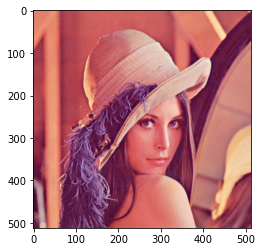

In [ ]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

In [ ]:
l = len(image.shape)
print(l)

3


In [ ]:
height, width, channel = image.shape
print("Image height or row: \t %s"%(height))
print("Image width or column: \t %s"%(width))
print("Image channel count: \t %s"%(channel))

Image height or row: 	 512
Image width or column: 	 512
Image channel count: 	 3


###### Task1.2:  Visualization of each channel

In [ ]:
def VisualizeChannel(image,channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel, one wish to visualize (can take value 0 (for red), 1(green), 2(blue))
    '''
    #write your code here 
    
    output = image[:,:,channel]     # select all rows and all column but a specid channel
    plt.imshow(output,cmap ='gray')
     
    return output    # 'output' is image's particular channel values 

maximum intensity value is 1.0
maximum intensity value is 0.21176471


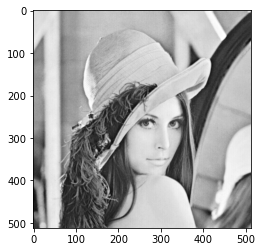

In [ ]:
out = VisualizeChannel(image,0)     # Red channel
print("maximum intensity value is %s" %(np.max(out)))
print("maximum intensity value is %s" %(np.min(out)))

maximum intensity value is 0.972549
maximum intensity value is 0.011764706


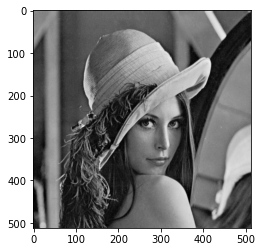

In [ ]:
out = VisualizeChannel(image,1)     # Green channel
print("maximum intensity value is %s" %(np.max(out)))
print("maximum intensity value is %s" %(np.min(out)))

maximum intensity value is 0.88235295
maximum intensity value is 0.03137255


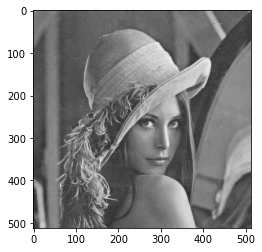

In [ ]:
out = VisualizeChannel(image,2)     # Blue channel
print("maximum intensity value is %s" %(np.max(out)))
print("maximum intensity value is %s" %(np.min(out)))

# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

In [ ]:
def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale
    image: RGB image
    '''
    #write you code here and visualize the result 
    
    rgb_weights = [0.2989, 0.5870, 0.1140]          #weights for each channel as per the formula 
    gray = np.dot(image[...,:3], rgb_weights)       # Alternatively one can visit each pixel location and apply transformation
                                                    # as per the formula 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. However it 
                                                    # is suggested to avoid for loop becaus eof time complexicity issues
    plt.imshow(gray,cmap='gray')
    
    
    return gray       #'gray' is grayscale image, converted from RGB image

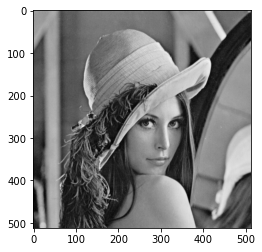

In [ ]:
gray_img = RGB2Gray(image)

###### Task2.2 : Gray to Binary

In [ ]:
def Gray2Binary(image,T):
    '''
    This function converts a gray image to binary based on the rule stated above. 
    image: image (can be RGB or gray); if the image is RGB, convert it to gray first
    T: Threshold
    '''
    
    #check if image is RGB if yes, convert it to gray 
    flag = len(image.shape)
    if flag == 3:        #i.e. RGB image, hence to be converted to gray
        # write code to convert it to gray or you can call function "RGB2Gray" defined in task2.1
        image = RGB2Gray(image)
        
    #Write code to threshold image based on the rule stated above and return this binarized image (say it 'bimage')
    image[image < T] = 0
    image[image >= T] = 1
    
    #write code to visualize the resultant image
    plt.imshow(image,cmap='gray')
    
    bimg = np.copy(image)        # or you can just return "image" without creating "bimg"
    return bimg
    

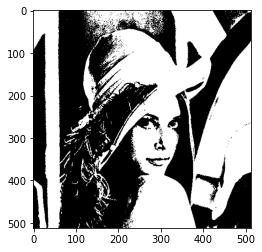

In [ ]:
binary_img = Gray2Binary(image,T=0.5)

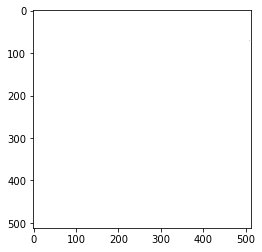

In [ ]:
binary_img = Gray2Binary(image,T=0.1)

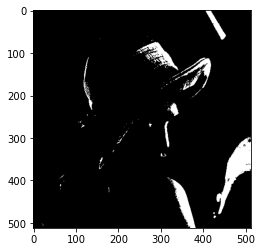

In [ ]:
binary_img = Gray2Binary(image,T=0.8)

######  Task2.3:  Crop a 5*5 section of a gray image

In [ ]:
def ImageCrop(image,r0,c0):
    '''
    This function crops 5*5 rectangular patch defined by image coordinates(r0,c0),(r0,c0+5),(r0+5,c0) and (r0+5,c0+5) 
    of an image.
    image: Image can be RGB or gray
    r0: starting row index
    c0: starting column index
    '''
    # write code to check if input is RGB , if its RGB convert it to gray
    if len(image.shape) == 3:
        image = RGB2Gray(image)    

    # write code to select 5*5 rectangular patch defined as above (say it 'patch')
    
    patch = image[r0:r0+5,c0:c0+5]          #select 5*5 patch
    
    # visualize patch and print its value
    
    plt.imshow(patch,cmap='gray')
    
    return patch

[[0.6343459  0.62629218 0.60892826 0.63808002 0.62580276]
 [0.6343459  0.62629218 0.60892826 0.63808002 0.62580276]
 [0.6343459  0.62629218 0.60892826 0.63808002 0.62580276]
 [0.6343459  0.62629218 0.60892826 0.63808002 0.62580276]
 [0.6343459  0.62629218 0.60892826 0.63808002 0.62580276]]


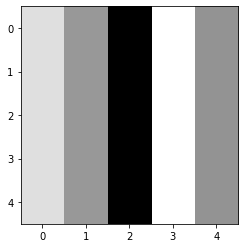

In [ ]:
patch = ImageCrop(image,r0=0,c0=10)
print(patch)

[[0.50572589 0.51956158 0.57038549 0.56842863 0.54556667]
 [0.54875569 0.55491883 0.56231451 0.5361655  0.5173204 ]
 [0.58044549 0.57369726 0.53166354 0.52512001 0.54336001]
 [0.54897412 0.54306471 0.53935452 0.56930471 0.57497216]
 [0.51052315 0.55915373 0.56599961 0.58146667 0.55483491]]


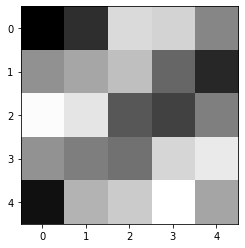

In [ ]:
patch = ImageCrop(image,r0=90,c0=200)
print(patch)

[[1.01145178 1.03912315 1.14077099 1.13685726 1.09113335]
 [1.09751138 1.10983766 1.12462903 1.07233099 1.0346408 ]
 [1.16089099 1.14739452 1.06332707 1.05024001 1.08672001]
 [1.09794825 1.08612942 1.07870903 1.13860942 1.14994432]
 [1.02104629 1.11830746 1.13199923 1.16293334 1.10966982]]


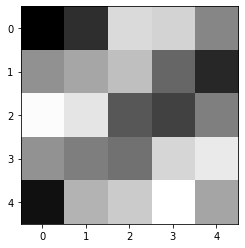

In [ ]:
# multiplication by 2
p2 = 2 * patch
plt.imshow(p2,cmap = 'gray')
print(p2)

In [ ]:
# create 5*5 array
array = np.random.random((5,5,))
print(array)

[[0.57962    0.54618993 0.46333273 0.94327365 0.31923815]
 [0.08384068 0.31258887 0.78989091 0.85656688 0.77025948]
 [0.50458623 0.98794477 0.23676168 0.34514239 0.64024562]
 [0.98719893 0.04500764 0.68185506 0.1147608  0.90629247]
 [0.89559992 0.02976238 0.52650918 0.28724661 0.95256517]]


[[1.08534589 1.06575151 1.03371823 1.51170228 0.86480483]
 [0.63259638 0.8675077  1.35220542 1.39273237 1.28757988]
 [1.08503173 1.56164203 0.76842522 0.8702624  1.18360562]
 [1.53617306 0.58807236 1.22120957 0.68406551 1.48126463]
 [1.40612307 0.58891611 1.0925088  0.86871328 1.50740008]]


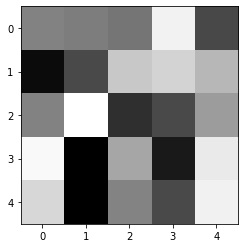

In [ ]:
print(patch +array)
plt.imshow(patch+array,cmap='gray')

###### Task2.4: Uniform Brightness Scaling

In [ ]:
def UniformBrightScaling(image,scale):
    '''
    This function uniformly increases or decreases the pixel values (of all image locations) by a factor 'scale'.
    image: image (can be RGB or gray image)
    scale: A scalar by which pixels'svalues need to be multiplied
    '''
    #write your code here 
    output = scale*image
    
    #display the resultant image
    plt.imshow(output)
    
    return output        #replace output with the variable name you used for final result
    

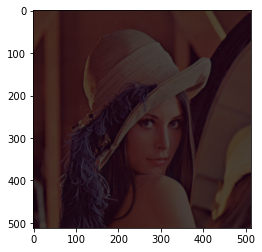

In [ ]:
scimg = UniformBrightScaling(image,scale=0.3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


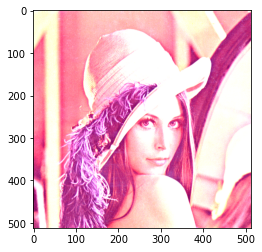

In [ ]:
scimg = UniformBrightScaling(image,scale=2)

# 3. Image Filtering

In [ ]:
def feature_extractor(image,kernel):
    '''
    This function performs convolution operation to a gray image. We will consider 3*3 kernel here. 
    In general kernel can have shape (2n+1) * (2n+1)  where n>= 0
    image: image (can be RGB or gray); if RGB convert it to gray
    kernel: 3*3 convolution kernel
    '''
    # first convert RGB to gray if input is RGB image
    
    l = len(image.shape)
    
    if l == 3:
        #write code to convert it to gray scale
        image = RGB2Gray(image)
        
        
    # write code to create a zero array of size (r,c) which will store the resultant value at specific pixel locations (say it output)
    output = np.zeros(image.shape)
        
    #write code to create a zero array with size (r+2,c+2) if (r,c) is the gray image size.  (say it pad_img)
    r,c = image.shape
    pad_img = np.zeros((r+2,c+2))
    
    
    #now copy gray image to above created array at location starting from (1,1)
    pad_img[1:r+1,1:c+1] = image 
    
    y,x = np.shape(pad_img)
    #write code to convolve the image 
    for row in range(0,y-2):
        for col in range(1,x-2):
            # select 3*3 patch with center at (row,col), flatten it. flatten the kernel and take dot product between both
            patch = kernel * pad_img[row:row+3,col:col+3]
            #print(patch)
            value = sum(sum(patch))   
            
            # store this scalar value to output matrix with starting location (0,0)
            
            output[row,col] = value
            
            
            
    return output

In [ ]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all 
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

In [ ]:
kernel = np.array([[1,0,-1],[0,0,0],[1,0,-1]])
print(kernel)

[[ 1  0 -1]
 [ 0  0  0]
 [ 1  0 -1]]


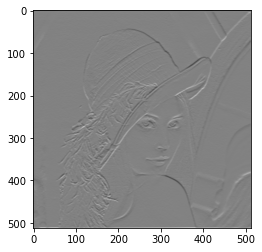

In [ ]:
out = feature_extractor(image,np.transpose(kernel))
plt.imshow(out,cmap='gray')

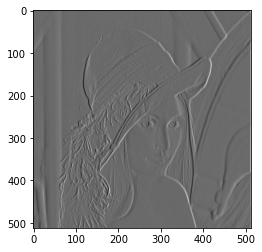

In [ ]:
out = feature_extractor(image,kernel)
plt.imshow(out,cmap='gray')

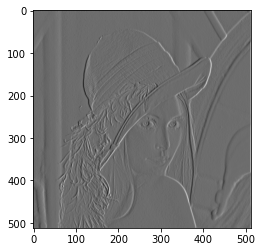

In [ ]:
kernel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
out = feature_extractor(image,kernel)
plt.imshow(out,cmap='gray')

# 4.Geometric Transformation

### Task4.1: Image Rotation (In-plane)

In [4]:
thetha = 10    #(#Note: If we had to rotate in clockwise thetha = -10)
#R = np.array([[np.cos(thetha),-1*np.sin(thetha)],[np.sin(thetha),np.cos(thetha)]])     #rotation matrix


In [ ]:
from PIL import Image

In [ ]:
image = Image.open("lena.png")
rot_img = image.rotate(thetha)
rot_img.show()

# 5. Solution of a system of equation 

###### Task5.1: Least square error

In [ ]:
def LeastSqSoln(A,b):
    '''
    Ax = b
    Convert the system of equations in form Ax = b
    '''
    # write your code here to find x'
    
    x = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(A),A)),np.transpose(A)),b)
    # if the exect solution were (1,1), write code to find square error (L2 norm)
    
    error = (np.array([[1],[1]]) - x)**2
    error= sum(error)
    
    return x,error

In [ ]:
A = np.array([[1,1],[1,-1]])
b = np.array([[2.006],[0.001]])
x,error =  LeastSqSoln(A,b)
print(x)
print(error)

[[1.0035]
 [1.0025]]
[1.85e-05]


In [ ]:
def LeastSqSoln2(A,b):
    '''
    Ax = b
    Convert the system of equations in form Ax = b
    '''
    # write your code here to find x'
    
    x = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(A),A)),np.transpose(A)),b)
   
    return x

In [ ]:
A = np.array([[2,3,1],[1,-1,3]])
b = np.array([[1],[0]])
x =  LeastSqSoln2(A,b)
print(x)

[[0.13333333]
 [0.23333333]
 [0.03333333]]


In [ ]:
u,s,vt = np.linalg.svd(A)

In [ ]:
print(u)

[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [ ]:
print(vt)

[[ 5.77350269e-01  5.77350269e-01  5.77350269e-01]
 [-8.74939832e-17 -7.07106781e-01  7.07106781e-01]
 [-8.16496581e-01  4.08248290e-01  4.08248290e-01]]


In [ ]:
print(s)

[3.87298335 3.16227766]
